In [1]:
# 변수의 shape, type, value 확인
def p(var,_name="") :
    if _name != "" : print(f'<<{_name}>>')
    if type(var)!=type([]):
        try:
            print(f'Shape:{var.shape}')
        except :
            pass
    print(f'Type: {type(var)}')
    print(f'Values: {var}')

def pst(_x,_name=""):
    print(f'<<{_name}>> Shape{_x.shape}, {type(_x)}')
def ps(_x,_name=""):
    print(f'<<{_name}>> Shape{_x.shape}')

## MNIST-1dCNN

### **Import Module**

In [2]:
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 3.5]
plt.rcParams["font.size"] = "8"

keras.__version__

'3.8.0'

# 1d-CNN. Mnist


In [3]:
# MNIST 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0   # (0~1)<-(0~255)

print(f"Original shape: {x_train.shape}")
ps(x_test[0:3]), ps(y_test[0:3])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Original shape: (60000, 28, 28)
<<>> Shape(3, 28, 28)
<<>> Shape(3,)


(None, None)

### Kernel size : 3

In [4]:
### **Model-1** : 1D CNN Model
# 주요 변수 정의
kernel_size = 3        # 1D conv kernel size
pool_size = 2          # pooling size
dense_units = 128      # dense layer units
out_dense = 10         # 출력은 숫자(0~9) 확률

## Model-1 설계 : 1D CNN 모델
def model_1(kernel_size=3):
    return keras.models.Sequential([
          keras.Input(shape=(28,28)),

          layers.TimeDistributed(                   #(bs,28,64)
              layers.Dense(64, activation='relu'), name='in_dense'),

          # 첫 번째 1D Conv 블록                      (bs,28,64)
          layers.Conv1D(64, kernel_size=kernel_size, padding='same'),
          layers.BatchNormalization(),
          layers.ReLU(),

          layers.MaxPooling1D(pool_size=pool_size), #(bs,14,64)
          # 두 번째 1D Conv 블록                      (bs,14,128)
          layers.Conv1D(128, kernel_size=kernel_size, padding='same'),
          layers.ReLU(),

          layers.MaxPooling1D(pool_size=pool_size), #(bs,7,128)
          # Global Average Pooling으로 차원 축소

          layers.GlobalAveragePooling1D(),          #(bs,128)
          # Dense layers
          layers.Dense(dense_units, activation='relu'),

          layers.Dense(out_dense, activation='softmax')
    ], name="1D-CNN")

model = model_1(3)  # Model Instance
model.summary()

Model: "1D-CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ in_dense (TimeDistributed)      │ (None, 28, 64)         │         1,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 28, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 28, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 14, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 14, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,970 (222.54 KB)

 Trainable params: 56,842 (222.04 KB)

 Non-trainable params: 128 (512.00 B)

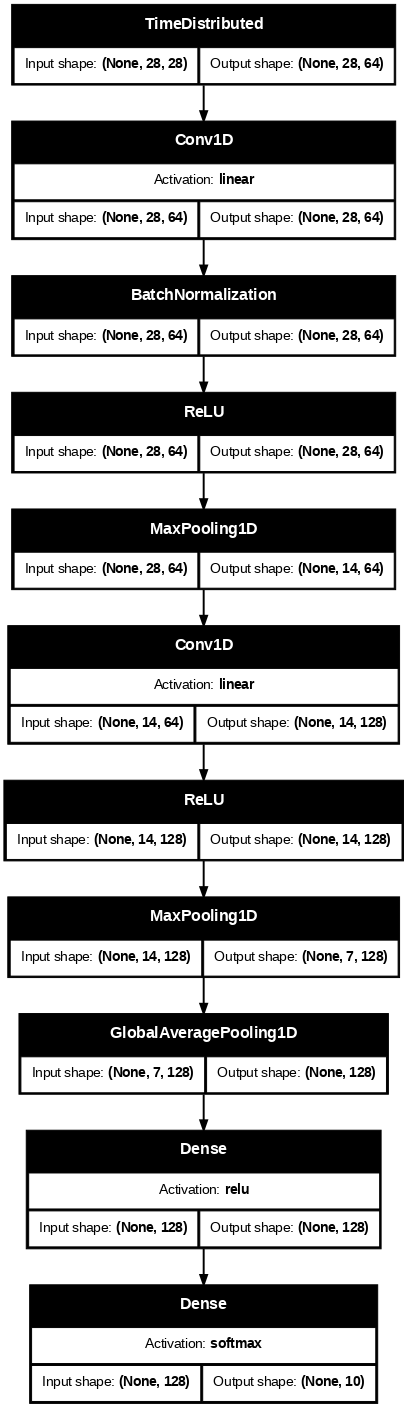

In [5]:
# 모델 시각화
keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True, dpi=70)

In [6]:
%%time
kernel_size=3
model = model_1(kernel_size)
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

batch_size = 512
history_1 = model.fit(x_train, y_train,  # 1D 형태의 데이터 사용
          validation_data=(x_test, y_test),
          batch_size=batch_size,
          epochs=30)
# Wall time: 52.8 s

Model: "1D-CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ in_dense (TimeDistributed)      │ (None, 28, 64)         │         1,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 28, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 28, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 14, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 14, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,970 (222.54 KB)

 Trainable params: 56,842 (222.04 KB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 24s 58ms/step - accuracy: 0.5675 - loss: 1.3982 - val_accuracy: 0.7228 - val_loss: 1.1135
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9299 - loss: 0.2544 - val_accuracy: 0.7416 - val_loss: 0.7372
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9539 - loss: 0.1601 - val_accuracy: 0.8816 - val_loss: 0.3745
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9670 - loss: 0.1150 - val_accuracy: 0.9580 - val_loss: 0.1403
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9734 - loss: 0.0925 - val_accuracy: 0.9701 - val_loss: 0.0964
Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9764 - loss: 0.0798 - val_accuracy: 0.9673 - val_loss: 0.1050
Epoch 7/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9792 - loss: 0.0714 - val_accuracy: 0.9756 - val_loss: 0.0785
Epoch 8/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9816 - loss: 0.0609 - val_accuracy

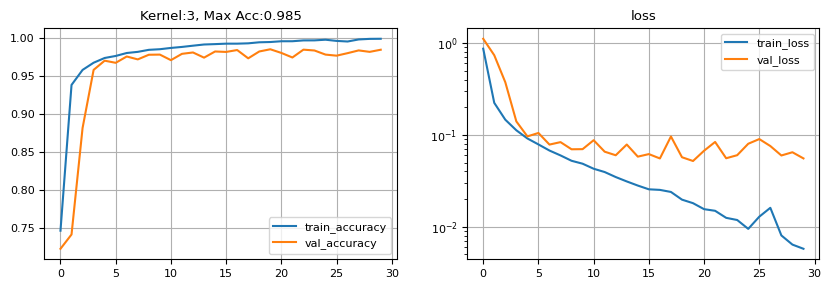

In [7]:
history = history_1.history

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.title(f"Kernel:{kernel_size}, Max Acc:{np.max(history['val_accuracy']):.3f}")
plt.plot(history['accuracy'], label='train_accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()

plt.subplot(122)
plt.title("loss")
plt.plot(history['loss'], label='train_loss')
plt.plot(history['val_loss'], label='val_loss')
plt.semilogy()
plt.legend()
plt.grid()
plt.show()

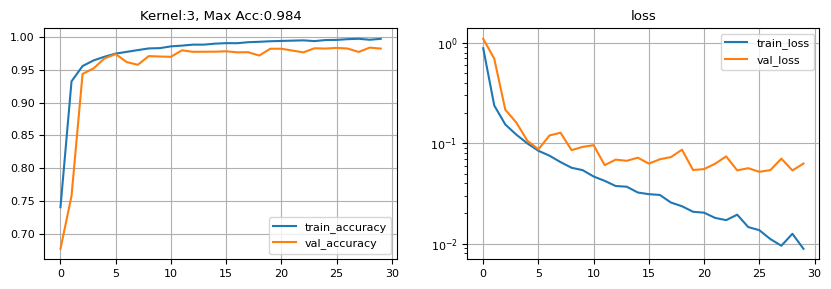

### Kernel size : 5

In [8]:
%%time
kernel_size=5
model = model_1(kernel_size)  # Model Instance
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

batch_size = 512
history_1 = model.fit(x_train, y_train,  # 1D 형태의 데이터 사용
          validation_data=(x_test, y_test),
          batch_size=batch_size,
          epochs=30)
# Wall time: 43.7 s

Model: "1D-CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ in_dense (TimeDistributed)      │ (None, 28, 64)         │         1,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 28, 64)         │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 28, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 14, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 14, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,546 (318.54 KB)

 Trainable params: 81,418 (318.04 KB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - accuracy: 0.6296 - loss: 1.2275 - val_accuracy: 0.5703 - val_loss: 1.1898
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9506 - loss: 0.1752 - val_accuracy: 0.8577 - val_loss: 0.4834
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9690 - loss: 0.1071 - val_accuracy: 0.9317 - val_loss: 0.2134
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9762 - loss: 0.0800 - val_accuracy: 0.9739 - val_loss: 0.0845
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9811 - loss: 0.0644 - val_accuracy: 0.9807 - val_loss: 0.0603
Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9841 - loss: 0.0544 - val_accuracy: 0.9558 - val_loss: 0.1319
Epoch 7/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9853 - loss: 0.0495 - val_accuracy: 0.9792 - val_loss: 0.0613
Epoch 8/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9861 - loss: 0.0438 - val_accuracy: 

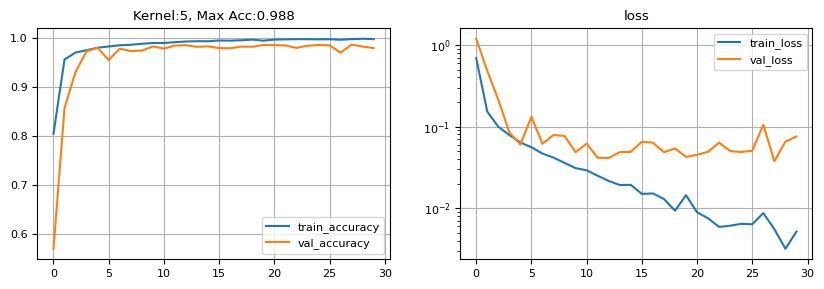

In [9]:
#### Plot
history = history_1.history

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.title(f"Kernel:{kernel_size}, Max Acc:{np.max(history['val_accuracy']):.3f}")
plt.plot(history['accuracy'], label='train_accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()

plt.subplot(122)
plt.title("loss")
plt.plot(history['loss'], label='train_loss')
plt.plot(history['val_loss'], label='val_loss')
plt.semilogy()
plt.legend()
plt.grid()
plt.show()

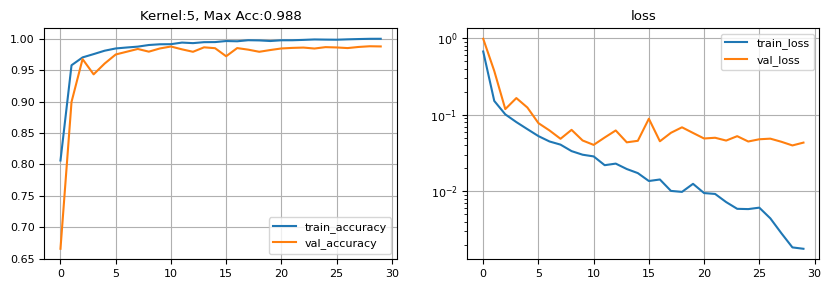

# Hierarchical 1d-CNN Mnist  
* 1단계: TimeDistributed + Conv1D로 각 행(28픽셀)을 개별 스캔  
* 2단계: 행별 특성들을 수직방향으로 Conv1D 스캔  
* 3단계: GlobalPooling으로 최종 특성 추출 후 분류  

In [10]:
# MNIST 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0   # (0~1)<-(0~255)
x_train = x_train.reshape(-1, 28, 28, 1)  # (60000, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(f"Data shape: {x_train.shape}")
ps(x_test[0:3]), ps(y_test[0:3])

Data shape: (60000, 28, 28, 1)
<<>> Shape(3, 28, 28, 1)
<<>> Shape(3,)


(None, None)

In [11]:
### **Hierarchical CNN Model** : Line-by-Line Scanning
# 1단계: 각 line을 1D Conv로 수평방향 스캔
# 2단계: 행들의 특성을 수직방향 스캔
def hierarchical_cnn_model():
    input_layer = keras.Input(shape=(28, 28, 1), name='input_image')
    # 전처리
    x = layers.BatchNormalization()(input_layer)
    x = layers.ReLU()(x)
    # 1단계: 각 행을 개별적으로 1D Conv로 처리
    x = layers.TimeDistributed(           #(bs,28,28,16)
          layers.Conv1D(32, 5, activation='relu', padding='same'), name='line_conv1d')(x)
    # AdaptiveAveragePooling1D 시뮬레이션 (28→14로 절반만 축소)
    x = layers.TimeDistributed(           #(bs,28,14,16)
        layers.AveragePooling1D(pool_size=2, strides=2))(x)
    # 추가 Conv로 더 정교한 특성 추출
    x = layers.TimeDistributed(           #(bs,28,14,32)
        layers.Conv1D(64, 3, activation='relu', padding='same') )(x)
    # 더 적극적으로 압축
    x = layers.TimeDistributed(           #(bs,28,32)
        layers.GlobalAveragePooling1D())(x)
    # 2단계: 행들 간의 관계를 스캔 (수직 방향) (bs,28,128)
    x = layers.Conv1D(128, 3, activation='relu', padding='same', name='vertical_conv1d' )(x)
    x = layers.Conv1D(128, 3, activation='relu', padding='same', name='vertical_conv1d_2')(x)
    # 최종 특성 추출                        (bs,128)
    x = layers.GlobalAveragePooling1D(name='global_pooling')(x)
    # 분류
    x = layers.Dense(64, activation='relu', name='dense')(x)
    output_layer = layers.Dense(10, activation='softmax', name='output')(x)
    model = keras.Model(inputs=input_layer, outputs=output_layer, name='Hierarchical_Line_CNN')
    return model

    # 모델 생성 및 요약
model = hierarchical_cnn_model()
model.summary()

Model: "Hierarchical_Line_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 1)      │             4 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_6 (ReLU)                  │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ line_conv1d (TimeDistributed)   │ (None, 28, 28, 32)     │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 28, 14, 32)     │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 28, 14, 64)     │         6,208 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 28, 64)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vertical_conv1d (Conv1D)        │ (None, 28, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vertical_conv1d_2 (Conv1D)      │ (None, 28, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_pooling                  │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,294 (348.80 KB)

 Trainable params: 89,292 (348.80 KB)

 Non-trainable params: 2 (8.00 B)

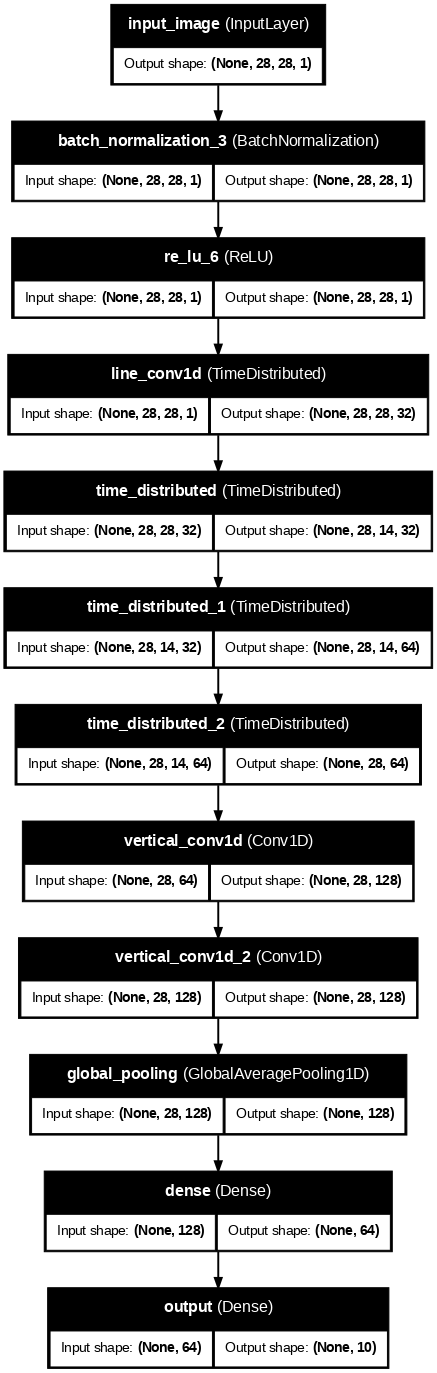

In [12]:
# 모델 구조 시각화
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, dpi=70)

In [13]:
%%time
model = hierarchical_cnn_model()
model.summary()
#### 모델 컴파일 및 훈련
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

batch_size = 512
history_hierarchical = model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          batch_size=batch_size,
          epochs=30,
          verbose=1)
# Wall time: 1min 54s

Model: "Hierarchical_Line_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 28, 28, 1)      │             4 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_7 (ReLU)                  │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ line_conv1d (TimeDistributed)   │ (None, 28, 28, 32)     │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 28, 14, 32)     │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 28, 14, 64)     │         6,208 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_5              │ (None, 28, 64)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vertical_conv1d (Conv1D)        │ (None, 28, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vertical_conv1d_2 (Conv1D)      │ (None, 28, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_pooling                  │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,294 (348.80 KB)

 Trainable params: 89,292 (348.80 KB)

 Non-trainable params: 2 (8.00 B)

Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 47s 191ms/step - accuracy: 0.2241 - loss: 2.0781 - val_accuracy: 0.3571 - val_loss: 1.7656
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.6559 - loss: 1.0607 - val_accuracy: 0.7338 - val_loss: 0.8104
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.7976 - loss: 0.6268 - val_accuracy: 0.8151 - val_loss: 0.5358
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.8295 - loss: 0.5048 - val_accuracy: 0.8322 - val_loss: 0.4640
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8414 - loss: 0.4540 - val_accuracy: 0.8449 - val_loss: 0.4299
Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8576 - loss: 0.4128 - val_accuracy: 0.8502 - val_loss: 0.3951
Epoch 7/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.8612 - loss: 0.3895 - val_accuracy: 0.8599 - val_loss: 0.3622
Epoch 8/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8748 - loss: 0.3529 - val_ac

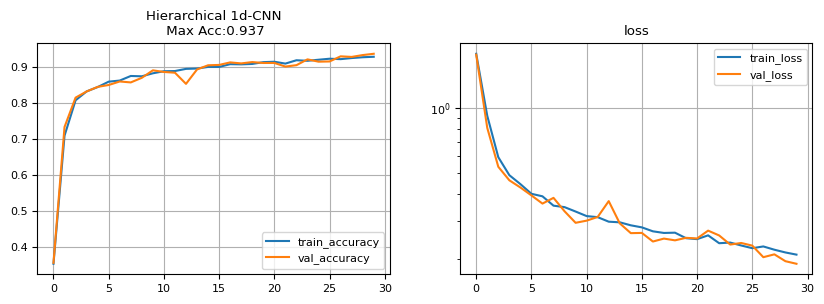

In [14]:
#### 결과 시각화
history = history_hierarchical.history

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.title(f"Hierarchical 1d-CNN\n Max Acc:{np.max(history['val_accuracy']):.3f}")
plt.plot(history['accuracy'], label='train_accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()

plt.subplot(122)
plt.title("loss")
plt.plot(history['loss'], label='train_loss')
plt.plot(history['val_loss'], label='val_loss')
plt.semilogy()
plt.legend()
plt.grid()
plt.show()

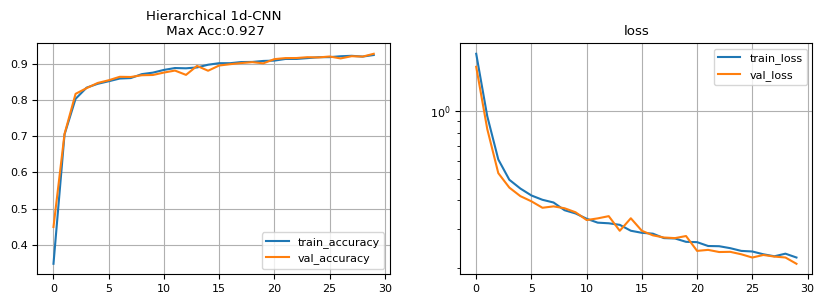

## 좀 더 정교한 모델  
* Time scale에서 다양한 filter size로 scan   

In [15]:
# 대안 모델: 더 복잡한 계층 구조
def advanced_hierarchical_cnn():
    """
    더 정교한 계층적 처리 구조
    """
    input_layer = keras.Input(shape=(28, 28, 1))
    x = layers.BatchNormalization()(input_layer)
    x = layers.ReLU()(x)

    # 1단계
    # kernel = 3 : (28,28,32)
    x1 = layers.TimeDistributed(
        layers.Conv1D(32, 3, activation='relu', padding='same'), name='h_conv1')(x)
    x1 = layers.TimeDistributed(layers.GlobalMaxPooling1D(), name='h_pool1')(x1)

    # kernel = 5 : (28,28,32)
    x2 = layers.TimeDistributed(
        layers.Conv1D(32, 5, activation='relu', padding='same'), name='h_conv2')(x)
    x2 = layers.TimeDistributed(layers.GlobalMaxPooling1D(), name='h_pool2')(x2)

    # kernel = 7 : (28,28,32)
    x3 = layers.TimeDistributed(
        layers.Conv1D(32, 7, activation='relu', padding='same'), name='h_conv3')(x)
    x3 = layers.TimeDistributed(layers.GlobalMaxPooling1D(), name='h_pool3')(x3)

    # 특성 결합 : (28,28,96)
    x = layers.Concatenate(axis=-1)([x1, x2, x3])

    # 2단계: 수직 방향 다중 스케일 처리 (bs,28,128)
    v1 = layers.Conv1D(128, 3, activation='relu', padding='same', name='v_conv1')(x)
    v2 = layers.Conv1D(128, 5, activation='relu', padding='same', name='v_conv2')(x)

    # 수직 특성 결합
#    v = layers.Add(name='v_add')([v1, v2])
    v = layers.Concatenate(axis=-1)([v1, v2])  # Shape: (batch_size, 28, 256)

    # 최종 처리
    x = layers.GlobalAveragePooling1D()(v)     #(bs,256)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    output_layer = layers.Dense(out_dense, activation='softmax')(x)

    model = keras.Model(inputs=input_layer, outputs=output_layer, name='Advanced_Hierarchical_CNN')
    return model

In [16]:
# 모델 생성 및 요약
model = advanced_hierarchical_cnn()
model.summary()

Model: "Advanced_Hierarchical_CNN"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28, 1) │          4 │ input_layer_3[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_8 (ReLU)      │ (None, 28, 28, 1) │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ h_conv1             │ (None, 28, 28,    │        128 │ re_lu_8[0][0]     │
│ (TimeDistributed)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ h_conv2             │ (None, 28, 28,    │        192 │ re_lu_8[0][0]     │
│ (TimeDistributed)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ h_conv3             │ (None, 28, 28,    │        256 │ re_lu_8[0][0]     │
│ (TimeDistributed)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ h_pool1             │ (None, 28, 32)    │          0 │ h_conv1[0][0]     │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ h_pool2             │ (None, 28, 32)    │          0 │ h_conv2[0][0]     │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ h_pool3             │ (None, 28, 32)    │          0 │ h_conv3[0][0]     │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 28, 96)    │          0 │ h_pool1[0][0],    │
│ (Concatenate)       │                   │            │ h_pool2[0][0],    │
│                     │                   │            │ h_pool3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ v_conv1 (Conv1D)    │ (None, 28, 128)   │     36,992 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ v_conv2 (Conv1D)    │ (None, 28, 128)   │     61,568 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 28, 256)   │          0 │ v_conv1[0][0],    │
│ (Concatenate)       │                   │            │ v_conv2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 256)       │          0 │ concatenate_1[0]… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 128)       │     32,896 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 10)        │      1,290 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 133,326 (520.80 KB)

 Trainable params: 133,324 (520.80 KB)

 Non-trainable params: 2 (8.00 B)

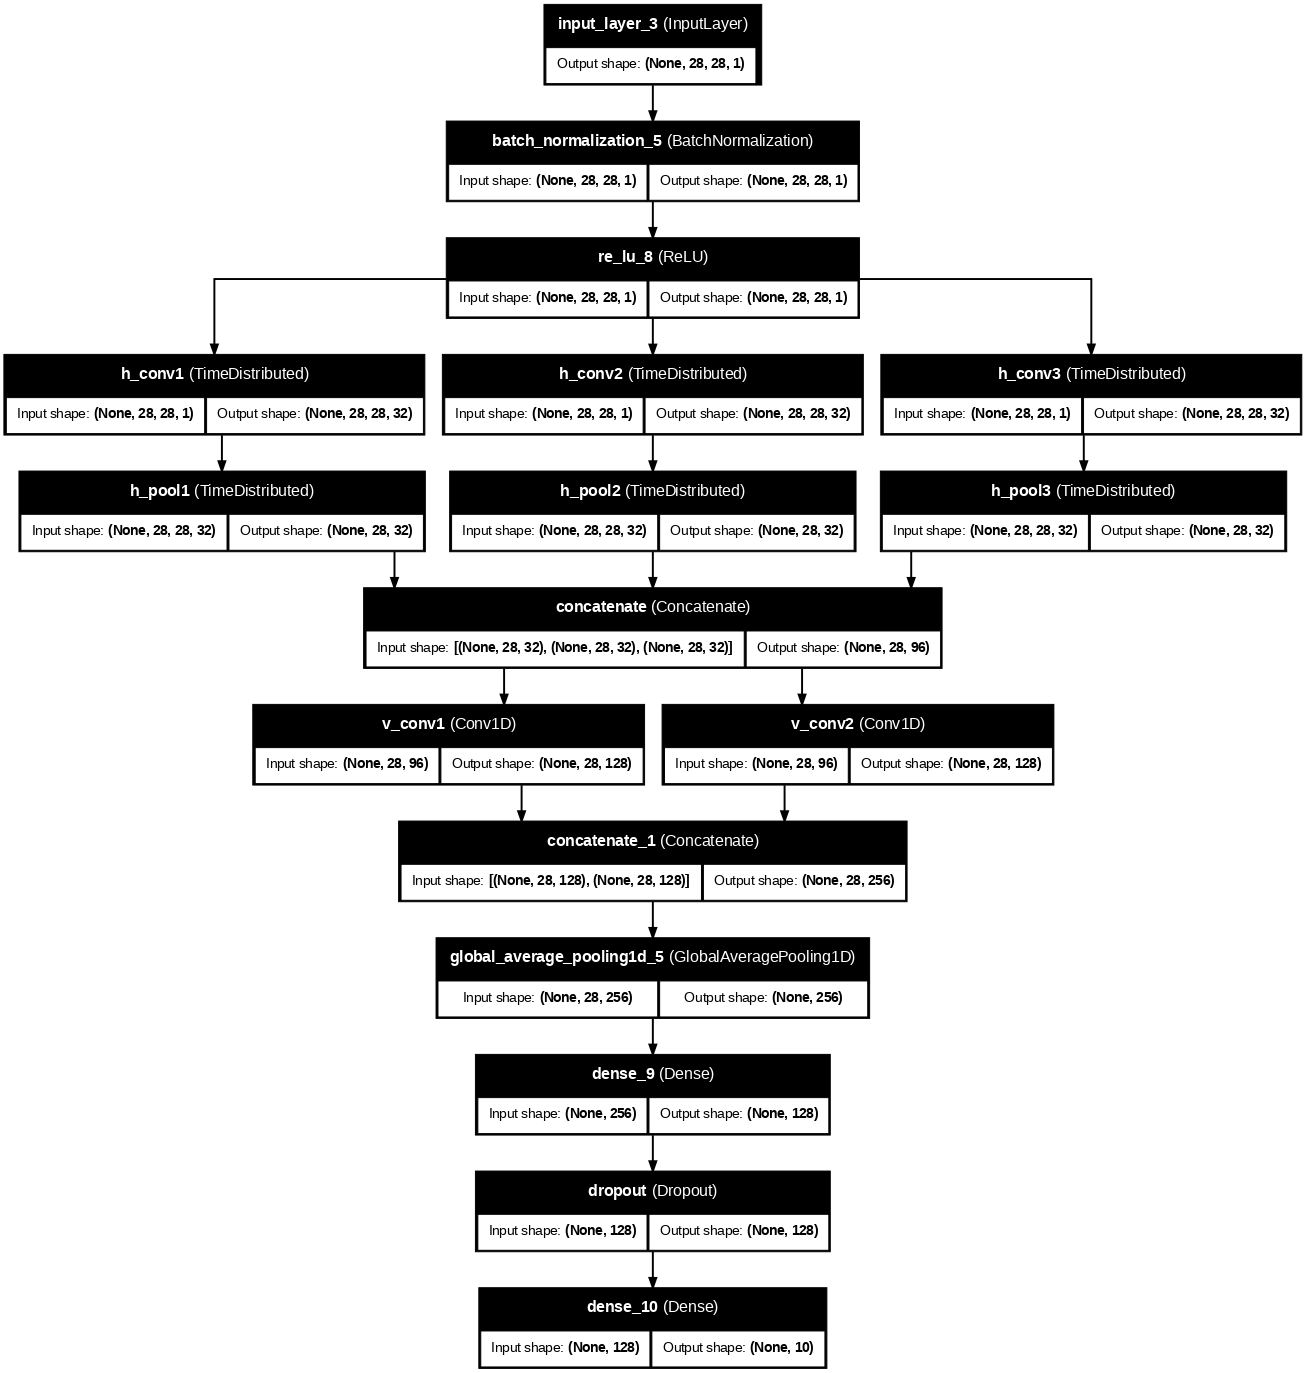

In [17]:
# 모델 구조 시각화
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, dpi=70)

In [18]:
%%time
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

batch_size = 512
history_hierarchical = model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          batch_size=batch_size,
          epochs=30,
          verbose=1)
# Wall time: 3min 32s

Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 93s 448ms/step - accuracy: 0.1549 - loss: 2.2265 - val_accuracy: 0.4603 - val_loss: 1.7891
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.4757 - loss: 1.4324 - val_accuracy: 0.6521 - val_loss: 1.1115
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6439 - loss: 1.0277 - val_accuracy: 0.7131 - val_loss: 0.8531
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6904 - loss: 0.8920 - val_accuracy: 0.7583 - val_loss: 0.6954
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.7166 - loss: 0.8210 - val_accuracy: 0.7575 - val_loss: 0.6967
Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.7396 - loss: 0.7662 - val_accuracy: 0.8021 - val_loss: 0.5970
Epoch 7/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.7606 - loss: 0.7105 - val_accuracy: 0.8257 - val_loss: 0.5415
Epoch 8/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7770 - loss: 0.6794 - val_ac

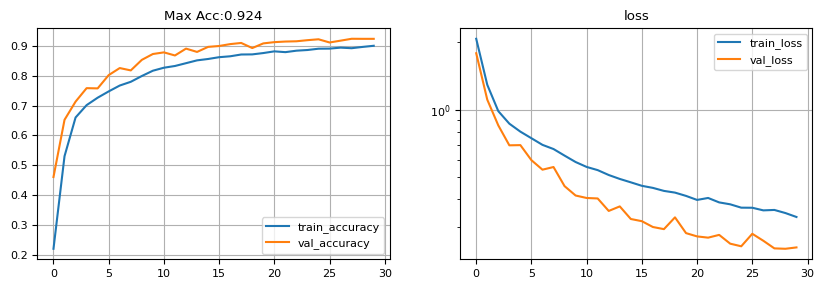

In [19]:
history = history_hierarchical.history

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.title(f"Max Acc:{np.max(history['val_accuracy']):.3f}")
plt.plot(history['accuracy'], label='train_accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()

plt.subplot(122)
plt.title("loss")
plt.plot(history['loss'], label='train_loss')
plt.plot(history['val_loss'], label='val_loss')
plt.semilogy()
plt.legend()
plt.grid()
plt.show()

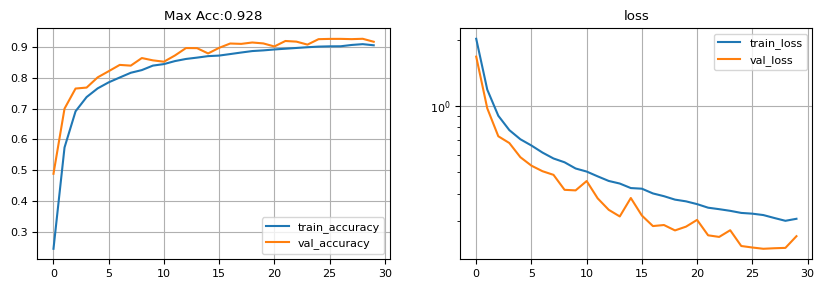

# 실습과제
## model1을 병렬로 최적화

In [27]:
### **Model-1** : 1D CNN Model
# 주요 변수 정의
kernel_size = 3        # 1D conv kernel size
pool_size = 2          # pooling size
dense_units = 128      # dense layer units
out_dense = 10         # 출력은 숫자(0~9) 확률

## Model-1 설계 : 1D CNN 모델
def model_1_parallel():
    input_layer = keras.Input(shape=(28, 28), name="input")

    # Step 1: Line-wise Dense feature extraction
    x = layers.TimeDistributed(layers.Dense(64, activation='relu'), name='line_dense')(input_layer)  # (bs, 28, 64)

    # Step 2: Parallel Conv1D layers (kernel 3, 5, 7)
    conv3 = layers.Conv1D(64, kernel_size=3, padding='same', activation='relu')(x)
    conv5 = layers.Conv1D(64, kernel_size=5, padding='same', activation='relu')(x)
    conv7 = layers.Conv1D(64, kernel_size=7, padding='same', activation='relu')(x)

    # Step 3: Concatenate multi-scale features
    x = layers.Concatenate(name='multi_kernel_concat')([conv3, conv5, conv7])  # (bs, 28, 192)

    # Step 4: Downsample
    x = layers.MaxPooling1D(pool_size=2)(x)  # (bs, 14, 192)

    # Optional deeper Conv1D
    x = layers.Conv1D(128, 3, padding='same', activation='relu')(x)
    x = layers.MaxPooling1D(pool_size=2)(x)  # (bs, 7, 128)

    # Global pooling
    x = layers.GlobalAveragePooling1D()(x)  # (bs, 128)

    # Fully connected
    x = layers.Dense(128, activation='relu')(x)
    output = layers.Dense(10, activation='softmax')(x)

    return keras.Model(inputs=input_layer, outputs=output, name='1D-CNN-Parallel')

model = model_1_parallel()  # Model Instance
model.summary()

Model: "1D-CNN-Parallel"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)  │ (None, 28, 28)    │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ line_dense          │ (None, 28, 64)    │      1,856 │ input[0][0]       │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_19 (Conv1D)  │ (None, 28, 64)    │     12,352 │ line_dense[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_20 (Conv1D)  │ (None, 28, 64)    │     20,544 │ line_dense[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_21 (Conv1D)  │ (None, 28, 64)    │     28,736 │ line_dense[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_kernel_concat │ (None, 28, 192)   │          0 │ conv1d_19[0][0],  │
│ (Concatenate)       │                   │            │ conv1d_20[0][0],  │
│                     │                   │            │ conv1d_21[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_10    │ (None, 14, 192)   │          0 │ multi_kernel_con… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_22 (Conv1D)  │ (None, 14, 128)   │     73,856 │ max_pooling1d_10… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_11    │ (None, 7, 128)    │          0 │ conv1d_22[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ max_pooling1d_11… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 128)       │     16,512 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 10)        │      1,290 │ dense_18[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 155,146 (606.04 KB)

 Trainable params: 155,146 (606.04 KB)

 Non-trainable params: 0 (0.00 B)

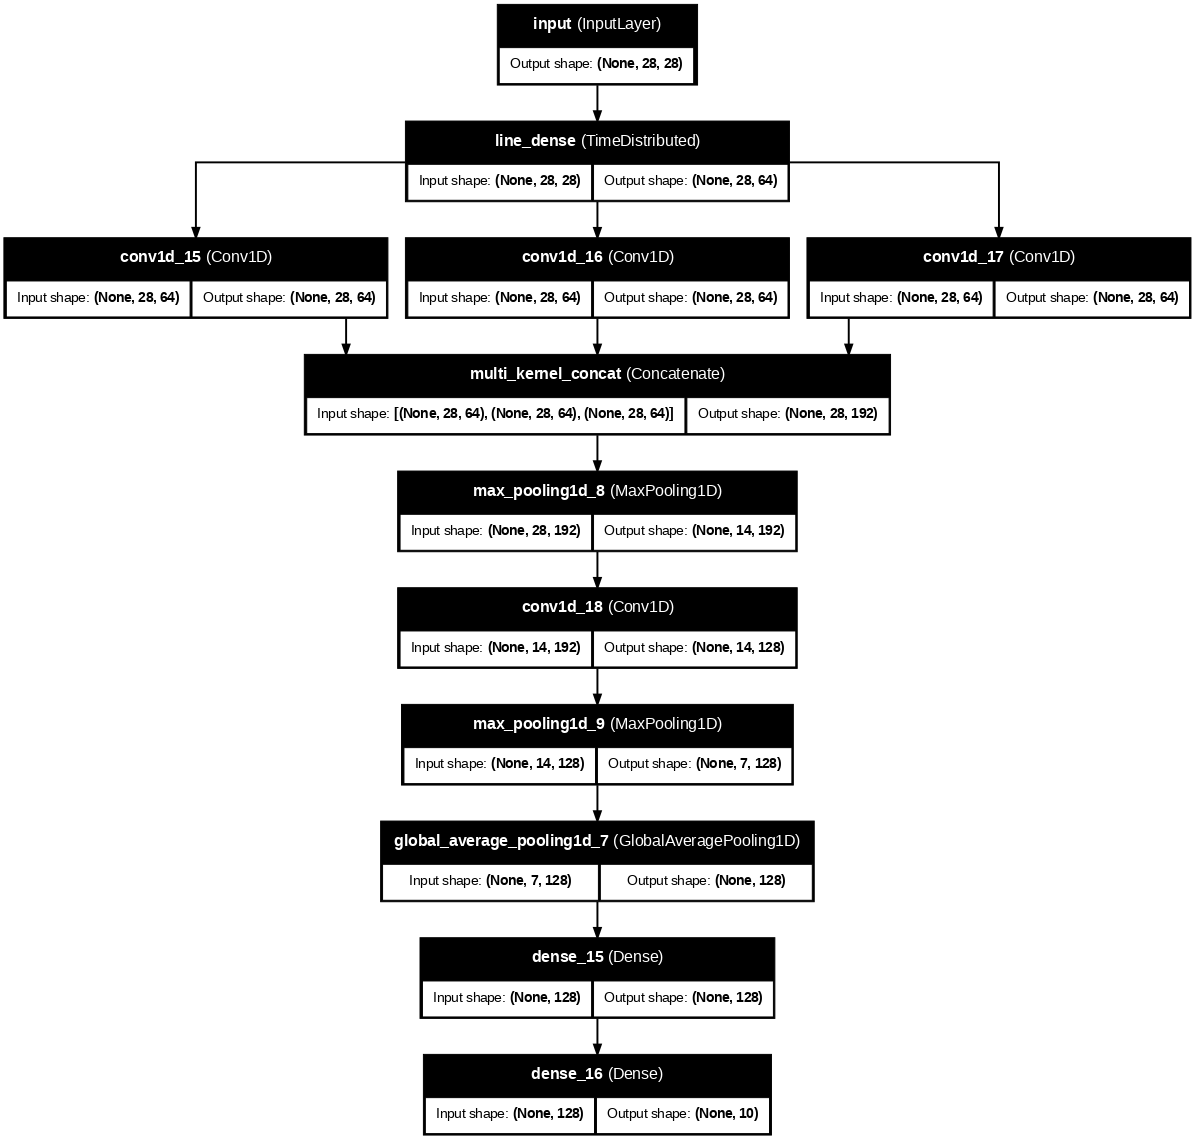

In [23]:

keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, dpi=70)

In [28]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

batch_size = 512
history_hierarchical = model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          batch_size=batch_size,
          epochs=60,
          verbose=1)

Epoch 1/60
118/118 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - accuracy: 0.4784 - loss: 1.5567 - val_accuracy: 0.8965 - val_loss: 0.3493
Epoch 2/60
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9108 - loss: 0.3111 - val_accuracy: 0.9446 - val_loss: 0.1935
Epoch 3/60
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9473 - loss: 0.1859 - val_accuracy: 0.9574 - val_loss: 0.1397
Epoch 4/60
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9559 - loss: 0.1533 - val_accuracy: 0.9654 - val_loss: 0.1207
Epoch 5/60
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9650 - loss: 0.1196 - val_accuracy: 0.9690 - val_loss: 0.1005
Epoch 6/60
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9699 - loss: 0.1027 - val_accuracy: 0.9729 - val_loss: 0.0933
Epoch 7/60
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9731 - loss: 0.0883 - val_accuracy: 0.9688 - val_loss: 0.0977
Epoch 8/60
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9739 - loss: 0.0851 - val_accuracy

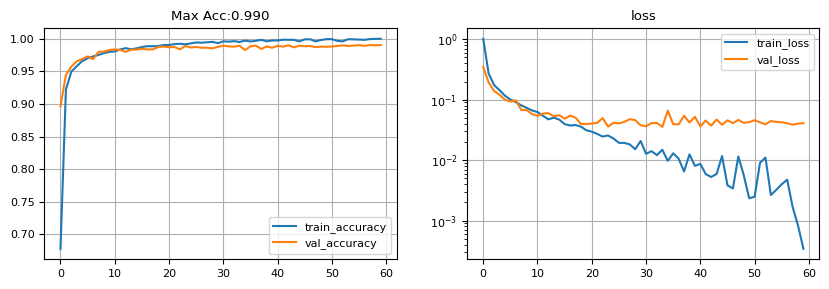

In [29]:
history = history_hierarchical.history

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.title(f"Max Acc:{np.max(history['val_accuracy']):.3f}")
plt.plot(history['accuracy'], label='train_accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()

plt.subplot(122)
plt.title("loss")
plt.plot(history['loss'], label='train_loss')
plt.plot(history['val_loss'], label='val_loss')
plt.semilogy()
plt.legend()
plt.grid()
plt.show()

- model1 대비 acc 상승 하였음
-

Model: "1D-CNN-Parallel"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)  │ (None, 28, 28)    │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ line_dense          │ (None, 28, 64)    │      1,856 │ input[0][0]       │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_35 (Conv1D)  │ (None, 28, 64)    │     12,352 │ line_dense[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_36 (Conv1D)  │ (None, 28, 64)    │     20,544 │ line_dense[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_37 (Conv1D)  │ (None, 28, 64)    │     28,736 │ line_dense[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_kernel_concat │ (None, 28, 192)   │          0 │ conv1d_35[0][0],  │
│ (Concatenate)       │                   │            │ conv1d_36[0][0],  │
│                     │                   │            │ conv1d_37[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_16    │ (None, 14, 192)   │          0 │ multi_kernel_con… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_38 (Conv1D)  │ (None, 14, 128)   │     73,856 │ max_pooling1d_16… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_39 (Conv1D)  │ (None, 14, 128)   │    123,008 │ max_pooling1d_16… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_40 (Conv1D)  │ (None, 14, 128)   │    172,160 │ max_pooling1d_16… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_kernel_conca… │ (None, 14, 384)   │          0 │ conv1d_38[0][0],  │
│ (Concatenate)       │                   │            │ conv1d_39[0][0],  │
│                     │                   │            │ conv1d_40[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_17    │ (None, 7, 384)    │          0 │ multi_kernel_con… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 384)       │          0 │ max_pooling1d_17… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_27 (Dense)    │ (None, 128)       │     49,280 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_28 (Dense)    │ (None, 10)        │      1,290 │ dense_27[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 483,082 (1.84 MB)

 Trainable params: 483,082 (1.84 MB)

 Non-trainable params: 0 (0.00 B)

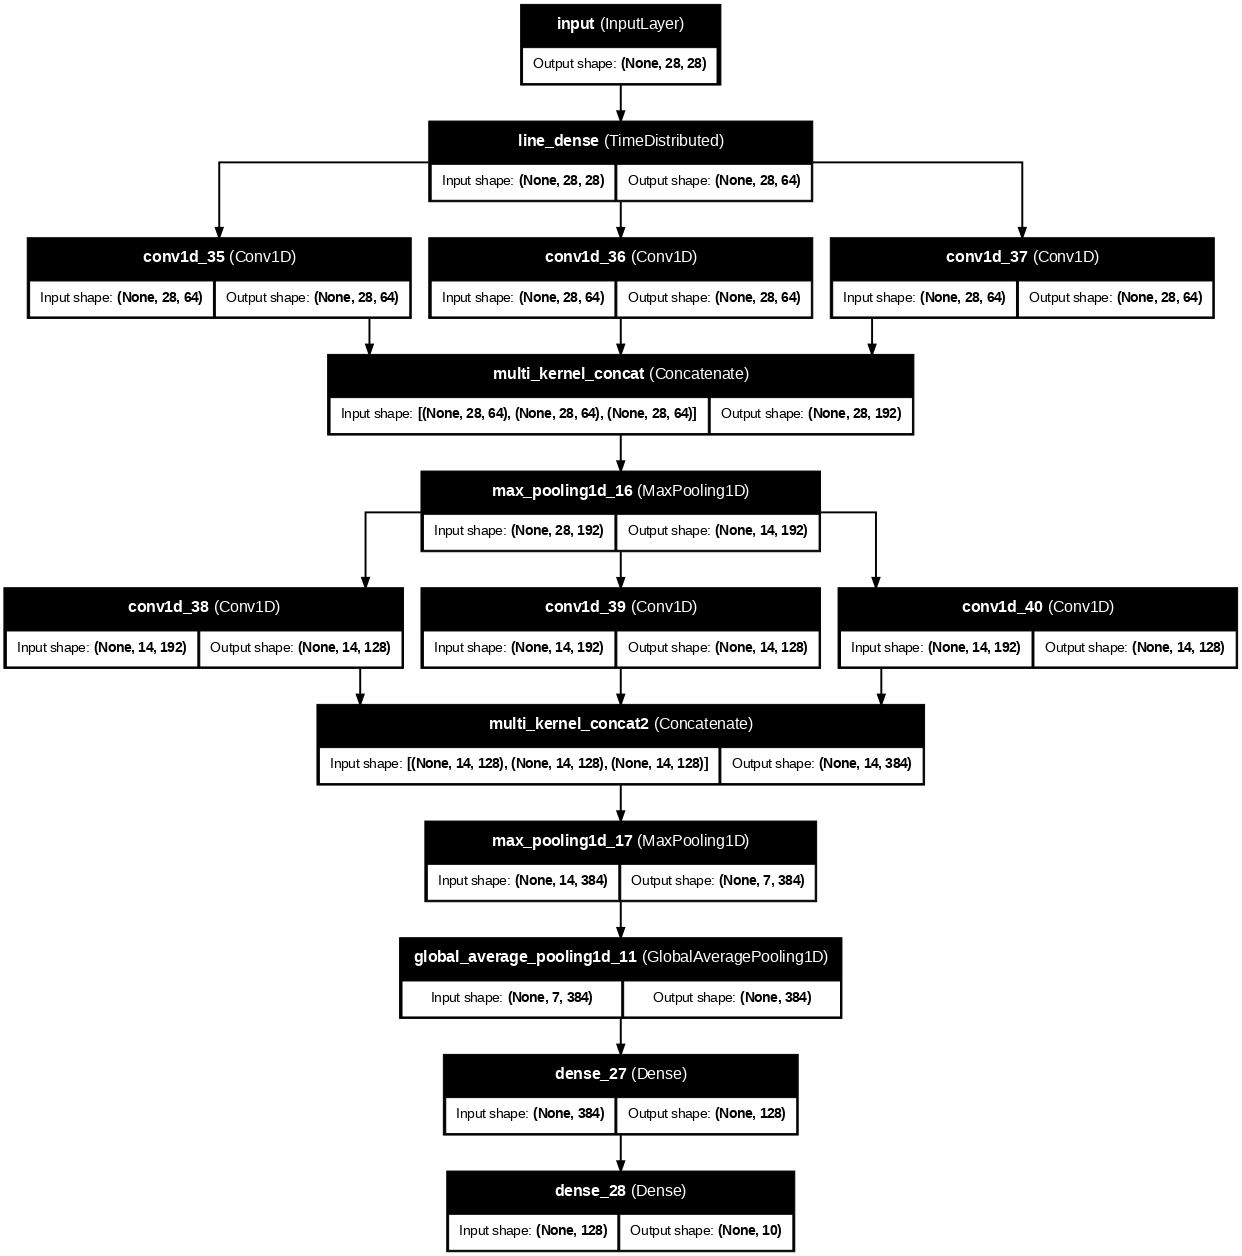

In [35]:
### **Model-1** : 1D CNN Model
# 주요 변수 정의
kernel_size = 3        # 1D conv kernel size
pool_size = 2          # pooling size
dense_units = 128      # dense layer units
out_dense = 10         # 출력은 숫자(0~9) 확률

## Model-1 설계 : 1D CNN 모델 --> 2번째 Layer도 병렬 처리
def model_1_parallel_2():
    input_layer = keras.Input(shape=(28, 28), name="input")

    # Step 1: Line-wise Dense feature extraction
    x = layers.TimeDistributed(layers.Dense(64, activation='relu'), name='line_dense')(input_layer)  # (bs, 28, 64)

    # Step 2: Parallel Conv1D layers (kernel 3, 5, 7)
    conv3 = layers.Conv1D(64, kernel_size=3, padding='same', activation='relu')(x)
    conv5 = layers.Conv1D(64, kernel_size=5, padding='same', activation='relu')(x)
    conv7 = layers.Conv1D(64, kernel_size=7, padding='same', activation='relu')(x)

    # Step 3: Concatenate multi-scale features
    x = layers.Concatenate(name='multi_kernel_concat')([conv3, conv5, conv7])  # (bs, 28, 192)

    # Step 4: Downsample
    x = layers.MaxPooling1D(pool_size=2)(x)  # (bs, 14, 192)

    # Optional deeper Conv1D
    # x = layers.Conv1D(128, 3, padding='same', activation='relu')(x)
    conv3_2 = layers.Conv1D(128, kernel_size=3, padding='same', activation='relu')(x)
    conv5_2 = layers.Conv1D(128, kernel_size=5, padding='same', activation='relu')(x)
    conv7_2 = layers.Conv1D(128, kernel_size=7, padding='same', activation='relu')(x)
    x = layers.Concatenate(name='multi_kernel_concat2')([conv3_2, conv5_2, conv7_2])  # (bs, 28, 192)
    x = layers.MaxPooling1D(pool_size=2)(x)  # (bs, 7, 128)

    # Global pooling
    x = layers.GlobalAveragePooling1D()(x)  # (bs, 128)

    # Fully connected
    x = layers.Dense(128, activation='relu')(x)
    output = layers.Dense(10, activation='softmax')(x)

    return keras.Model(inputs=input_layer, outputs=output, name='1D-CNN-Parallel')

model = model_1_parallel_2()  # Model Instance
model.summary()


keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, dpi=70)

In [36]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

batch_size = 512
history_hierarchical2 = model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          batch_size=batch_size,
          epochs=60,
          verbose=1)

Epoch 1/60
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 74ms/step - accuracy: 0.5927 - loss: 1.2556 - val_accuracy: 0.9350 - val_loss: 0.2168
Epoch 2/60
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9445 - loss: 0.1904 - val_accuracy: 0.9561 - val_loss: 0.1405
Epoch 3/60
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9607 - loss: 0.1262 - val_accuracy: 0.9720 - val_loss: 0.0906
Epoch 4/60
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9721 - loss: 0.0926 - val_accuracy: 0.9773 - val_loss: 0.0719
Epoch 5/60
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9780 - loss: 0.0736 - val_accuracy: 0.9838 - val_loss: 0.0555
Epoch 6/60
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9820 - loss: 0.0600 - val_accuracy: 0.9817 - val_loss: 0.0578
Epoch 7/60
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9835 - loss: 0.0536 - val_accuracy: 0.9812 - val_loss: 0.0550
Epoch 8/60
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9870 - loss: 0.0419 - val_acc

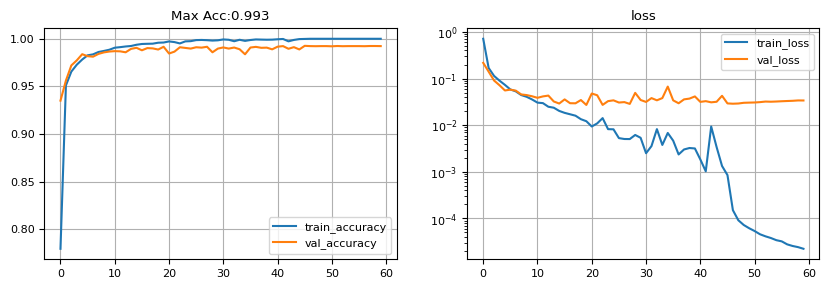

In [37]:
history = history_hierarchical2.history

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.title(f"Max Acc:{np.max(history['val_accuracy']):.3f}")
plt.plot(history['accuracy'], label='train_accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()

plt.subplot(122)
plt.title("loss")
plt.plot(history['loss'], label='train_loss')
plt.plot(history['val_loss'], label='val_loss')
plt.semilogy()
plt.legend()
plt.grid()
plt.show()